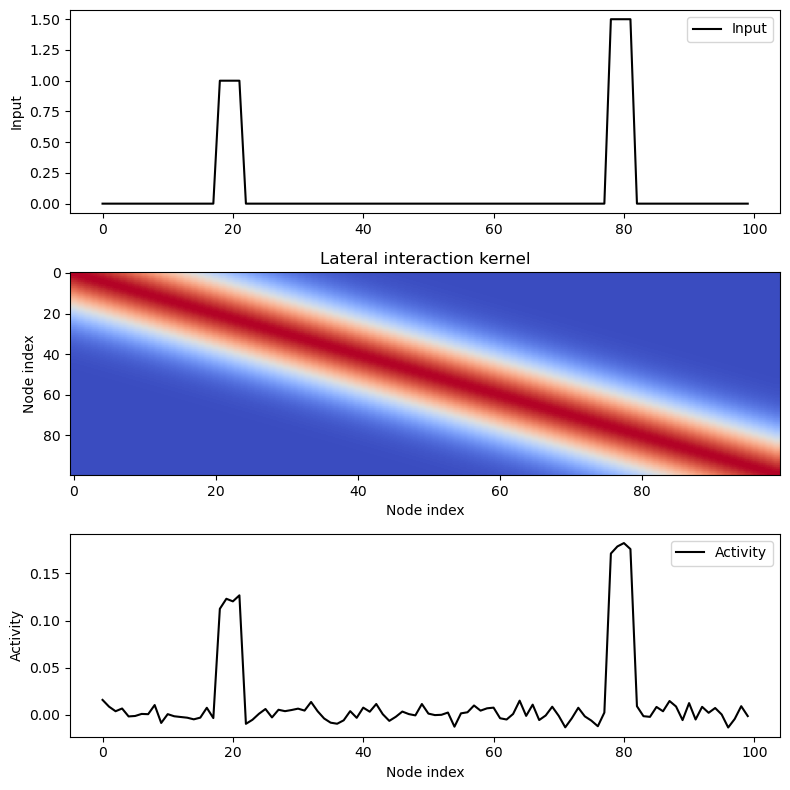

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.01685
σ1 = 0.003
μ2 = 0.0065
σ2 = 0.0016
T = 50 # ms
sigma = 2 * np.pi / 10
Delta_x = 2 * np.pi / 100
A = 1
N = 100
beta = 0.5
theta = 0.5
mu_n = 0
sigma_n = 0.05
ntrials = 5000

# Define the sigmoid function
def sigmoid(x, beta, theta):
    return 1 / (1 + np.exp(-beta * x)) - theta

# Define the lateral interaction kernel
def lateral_kernel(i, j, B, C, sigma):
    return B * (1 / (np.sqrt(4 * np.pi) * sigma) * np.exp(-((i - j) * Delta_x)**2 / (4 * sigma**2)) - C)

# Initialize variables
x = np.zeros(N)
r = np.zeros(N)
w = np.zeros((N, N))

# Populate the lateral interaction kernel
for i in range(N):
    for j in range(N):
        w[i, j] = lateral_kernel(i, j, 1, C, sigma)

# Define the external inputs
I = np.zeros(N)
I[18:22] = Ir
I[78:82] = Ip
#I[:3] = Ir
#I[N//2-1:N//2+2] = Ip

# Run the simulation
for t in range(5000):
    # Calculate the total input to each node
    I_net = I + np.dot(w, r) + np.random.normal(mu_n, sigma_n, N)

    # Update the activity of each node
    x += -x + I_net
    r = sigmoid(x, beta, theta)

    # Check for threshold crossing
    if np.any(r > Th):
        RT = t + 30
        break

# Plot the dynamics
fig, ax = plt.subplots(3, 1, figsize=(8, 8))

ax[0].plot(np.arange(N), I, 'k', label='Input')
ax[0].legend()
ax[0].set_ylabel('Input')

ax[1].imshow(w, cmap='coolwarm', aspect='auto')
ax[1].set_xlabel('Node index')
ax[1].set_ylabel('Node index')
ax[1].set_title('Lateral interaction kernel')

ax[2].plot(np.arange(N), r, 'k', label='Activity')
ax[2].legend()
ax[2].set_xlabel('Node index')
ax[2].set_ylabel('Activity')

plt.tight_layout()
plt.show()

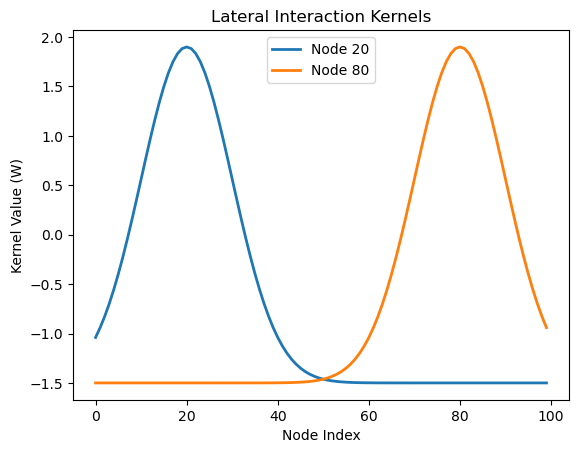

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
N = 100  # number of nodes in the SC
sigma = 2*np.pi/10  # standard deviation of the Gaussian
delta_x = 2*np.pi/N  # spacing between the nodes
A = 3.4  # amplitude of the Gaussian
beta = 1.5 # shift factor of the Gaussian

# Define the kernels for nodes 20 and 80
node20_kernel = np.zeros(N)
node80_kernel = np.zeros(N)

for i in range(N):
    distance_from_20 = np.abs(i - 20)
    distance_from_80 = np.abs(i - 80)
    node20_kernel[i] = A * np.exp(-((distance_from_20 * delta_x)**2) / (2 * sigma**2)) - beta
    node80_kernel[i] = A * np.exp(-((distance_from_80 * delta_x)**2) / (2 * sigma**2)) - beta

# Plot the kernels
fig, ax = plt.subplots()
ax.plot(node20_kernel, linewidth=2, label='Node 20')
ax.plot(node80_kernel, linewidth=2, label='Node 80')
ax.set_title('Lateral Interaction Kernels')
ax.set_xlabel('Node Index')
ax.set_ylabel('Kernel Value (W)')
ax.legend()
plt.show()


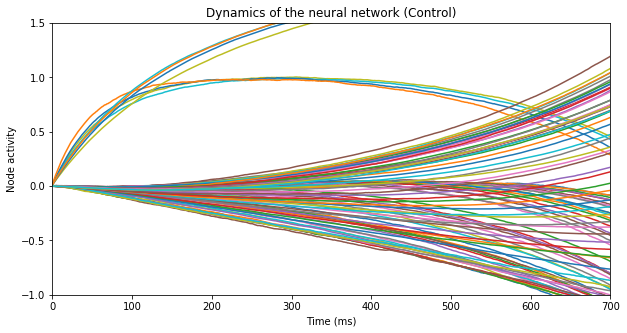

In [29]:
# Control Dynamics

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.01685
σ1 = 0.003
μ2 = 0.0065
σ2 = 0.0016
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(1/(np.sqrt(4*np.pi) * σ) * np.exp(-((i-j)*Δx)**2 / (4*σ**2)) - C)

# Initialize variables
x = np.zeros(N) # internal state of nodes
tau = np.zeros(N) # integration time constant
for i in range(N//2):
    tau[i] = np.random.normal(μ1, σ1)
for i in range(N//2, N):
    tau[i] = np.random.normal(μ2, σ2)
w = np.zeros((N,N)) # synaptic efficacies
for i in range(N):
    for j in range(N):
        w[i,j] = lateral_kernel(i, j)
I_ext = np.zeros(N) # external input
I_ext[18:22] = Ir
I_ext[78:82] = Ip
In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
dt = 1 # time step
tmax = 0.65 # maximum time to simulate
nt = 5000 # number of time steps
x_hist = np.zeros((N, nt)) # history of node activity

# Simulate network
for i in range(nt):
    dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
    x += dxdt * (tau)
    x_hist[:,i] = x

# Plot node activity over time
fig, ax = plt.subplots(figsize=(10,5))
for i in range(N):
    ax.plot(np.arange(nt)*dt, x_hist[i,:])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Node activity')
ax.set_title('Dynamics of the neural network (Control)')
ax.set_xlim([0,700])
ax.set_ylim([-1,1.5])
plt.show()

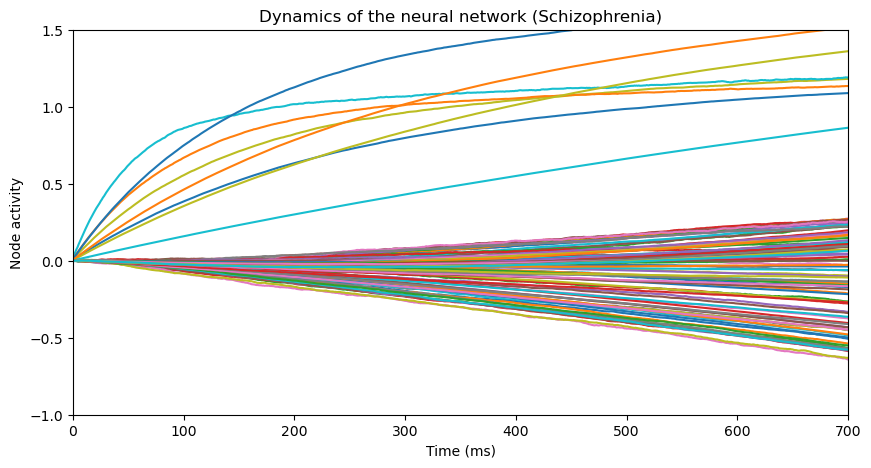

In [90]:
# Schizophrenia Dynamics

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0135
σ1 = 0.005
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(1/(np.sqrt(4*np.pi) * σ) * np.exp(-((i-j)*Δx)**2 / (4*σ**2)) - C)

# Initialize variables
x = np.zeros(N) # internal state of nodes
tau = np.zeros(N) # integration time constant
for i in range(N//2):
    tau[i] = np.random.normal(μ1, σ1)
for i in range(N//2, N):
    tau[i] = np.random.normal(μ2, σ2)
w = np.zeros((N,N)) # synaptic efficacies
for i in range(N):
    for j in range(N):
        w[i,j] = lateral_kernel(i, j)
I_ext = np.zeros(N) # external input
I_ext[18:22] = Ir
I_ext[78:82] = Ip
In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
dt = 1 # time step
tmax = 0.65 # maximum time to simulate
nt = 5000 # number of time steps
x_hist = np.zeros((N, nt)) # history of node activity

# Simulate network
for i in range(nt):
    dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
    x += dxdt * (tau)
    x_hist[:,i] = x

# Plot node activity over time
fig, ax = plt.subplots(figsize=(10,5))
for i in range(N):
    ax.plot(np.arange(nt)*dt, x_hist[i,:])
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Node activity')
ax.set_title('Dynamics of the neural network (Schizophrenia)')
ax.set_xlim([0,700])
ax.set_ylim([-1,1.5])
plt.show()

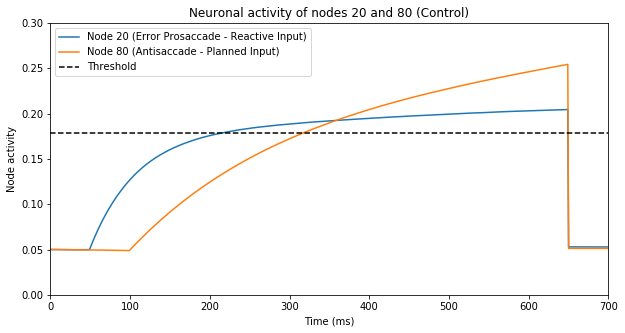

In [4]:
# Control Condition

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.01685
σ1 = 0.003
μ2 = 0.0065
σ2 = 0.0016
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.005
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

# Initialize variables
x = np.zeros(N) # internal state of nodes
tau = np.zeros(N) # integration time constant
for i in range(N//2):
    tau[i] = np.random.normal(μ1, σ1)
for i in range(N//2, N):
    tau[i] = np.random.normal(μ2, σ2)
w = np.zeros((N,N)) # synaptic efficacies
for i in range(N):
    for j in range(N):
        w[i,j] = lateral_kernel(i, j)
I_ext = np.zeros(N) # external input
I_ext[18:22] = Ir
I_ext[78:82] = Ip
I_ext[20] = 0
I_ext[80] = 0
In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
dt = 1 # time step
nt = 5000 # number of time steps
x_hist = np.zeros((N, nt)) # history of node activity

# Simulate network
for i in range(nt):
    if i*dt >= 50:
        I_ext[18:22] = Ir
    if i*dt >= 100:
        I_ext[78:82] = Ip
    if i*dt >= 650:
        x[20] = 0
        x[80] = 0
    dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
    x += dxdt * (tau)
    x_hist[:,i] = x * (0.126)

# Plot node activity over time
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(nt)*dt, x_hist[20,:] + 0.05, label='Node 20 (Error Prosaccade - Reactive Input)')
ax.plot(np.arange(nt)*dt, x_hist[80,:] + 0.05, label='Node 80 (Antisaccade - Planned Input)')
ax.axhline(y=Th, color='black', linestyle='--', label='Threshold')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Node activity')
ax.set_title('Neuronal activity of nodes 20 and 80 (Control)')
ax.set_xlim([0,700])
ax.set_ylim([0,0.3])
ax.legend()
plt.show()

In [9]:
# Control Condition Error Rate and Rate of Error Correction

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.01685
σ1 = 0.003
μ2 = 0.0065
σ2 = 0.0016
T = 50e-3
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.005
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

count = 0  # initialize count
count2 = 0 # initialize count2

for i in range(500):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        # Check if node 20 reaches threshold before node 80
        if x[19] >= Th and x[79] < Th:
            count += 1
            break  # exit loop if condition is satisfied

for i in range(500):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
           
        if x[79] >= Th and x[19] >= Th:
            count2 += 1
            break
            
print("Control Condition")
print()
print(f"(Error) Node 20 reached the threshold before node 80 in {count} out of 500 trials.")
percentage = float((count/500)*100)
print("(Error) Node 20 reached the threshold before Node 80 in {:.2f}% of simulations".format(percentage))

print(f"(Correction) Node 80 reached the threshold after node 20 in {count2} out of {count} times.")
percentage2 = float((count2/count)*100)
print("(Correction) Node 80 reached the threshold after Node 20 in {:.2f}% of simulations".format(percentage2))

Control Condition

(Error) Node 20 reached the threshold before node 80 in 62 out of 500 trials.
(Error) Node 20 reached the threshold before Node 80 in 12.40% of simulations
(Correction) Node 80 reached the threshold after node 20 in 51 out of 62 times.
(Correction) Node 80 reached the threshold after Node 20 in 82.26% of simulations


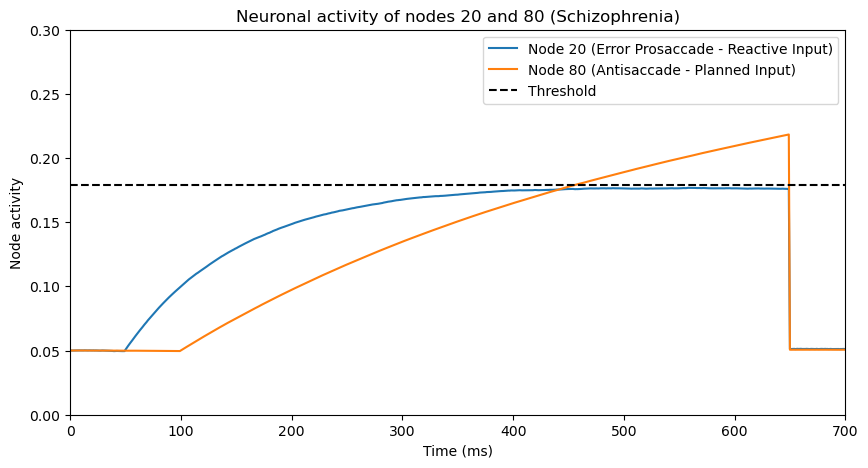

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Schizophrenia Condition

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0135
σ1 = 0.005
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.005
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

# Initialize variables
x = np.zeros(N) # internal state of nodes
tau = np.zeros(N) # integration time constant
for i in range(N//2):
    tau[i] = np.random.normal(μ1, σ1)
for i in range(N//2, N):
    tau[i] = np.random.normal(μ2, σ2)
w = np.zeros((N,N)) # synaptic efficacies
for i in range(N):
    for j in range(N):
        w[i,j] = lateral_kernel(i, j)
I_ext = np.zeros(N) # external input
I_ext[18:22] = Ir
I_ext[78:82] = Ip
I_ext[20] = 0
I_ext[80] = 0
In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
dt = 1 # time step
nt = 5000 # number of time steps
x_hist = np.zeros((N, nt)) # history of node activity

# Simulate network
for i in range(nt):
    if i*dt >= 50:
        I_ext[18:22] = Ir
    if i*dt >= 100:
        I_ext[78:82] = Ip
    if i*dt >= 650:
        x[20] = 0
        x[80] = 0
    dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
    x += dxdt * (tau)
    x_hist[:,i] = x * (0.126)

# Plot node activity over time
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(np.arange(nt)*dt, x_hist[20,:] + 0.05, label='Node 20 (Error Prosaccade - Reactive Input)')
ax.plot(np.arange(nt)*dt, x_hist[80,:] + 0.05, label='Node 80 (Antisaccade - Planned Input)')
ax.axhline(y=Th, color='black', linestyle='--', label='Threshold')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Node activity')
ax.set_title('Neuronal activity of nodes 20 and 80 (Schizophrenia)')
ax.set_xlim([0,700])
ax.set_ylim([0,0.3])
ax.legend()
plt.show()

In [36]:
# Schizophrenia Condition Error Rate and Rate of Error Correction

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0135
σ1 = 0.005
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.005
ntrials = 5000
trials = 1000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

count = 0  # initialize count
count2 = 0 # initialize count2

for i in range(trials):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    reached_th = np.zeros(N) # to keep track of which nodes have reached threshold
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
            reached_th[20] = 0 # reset the threshold flag for node 20
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        # Check if node 20 reaches threshold before node 80
        #if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
        #    count += 1
        #    break
        
        # Check if node 20 or node 80 reaches threshold
        if x_hist[20,i] + 0.05 >= Th or x_hist[80,i] + 0.05 >= Th:
            # Check if both node 20 and node 80 have reached the threshold
            if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 >= Th:
                # Check if node 20 reached the threshold before node 80
                if np.argmax(x_hist[:,i] == x_hist[20,i]) < np.argmax(x_hist[:,i] == x_hist[80,i]):
                    count += 1
                    break        
            # Check if only node 20 reached the threshold
            elif x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
                count += 1
                break
                
for i in range(trials):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    reached_th = np.zeros(N) # to keep track of which nodes have reached threshold
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
            reached_th[20] = 0 # reset the threshold flag for node 20
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        # Check if node 20 reaches threshold before node 80
        #if x_hist[20,i] + 0.05 >= Th and reached_th[20] == 0:
        #    reached_th[20] = 1 # set the threshold flag for node 20
        #    continue
        #if x_hist[80,i] + 0.05 >= Th and reached_th[20] == 1:
        #    count2 += 1
        #    reached_th[80] = 1 # set the threshold flag for node 80
        #    break
            
        # Check if both node 20 and node 80 have reached the threshold
        if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 >= Th:
            # Check if node 80 reached the threshold after node 20
            if np.argmax(x_hist[:,i] == x_hist[20,i]) < np.argmax(x_hist[:,i] == x_hist[80,i]):
                count2 += 1
                break

print("Schizophrenia Condition")
print()
print(f"(Error) Node 20 reached the threshold before node 80 in {count} out of {trials} trials.")
percentage = float((count/trials)*100)
print("(Error) Node 20 reached the threshold before Node 80 in {:.2f}% of simulations".format(percentage))

print(f"(Correction) Node 80 reached the threshold after node 20 in {count2} out of {count} times.")
percentage2 = float((count2/count)*100)
print("(Correction) Node 80 reached the threshold after Node 20 in {:.2f}% of simulations".format(percentage2))

C:\Users\micha\AppData\Local\Temp\ipykernel_7820\1850225509.py:28: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-x))) - θ


Schizophrenia Condition

(Error) Node 20 reached the threshold before node 80 in 511 out of 1000 trials.
(Error) Node 20 reached the threshold before Node 80 in 51.10% of simulations
(Correction) Node 80 reached the threshold after node 20 in 333 out of 511 times.
(Correction) Node 80 reached the threshold after Node 20 in 65.17% of simulations


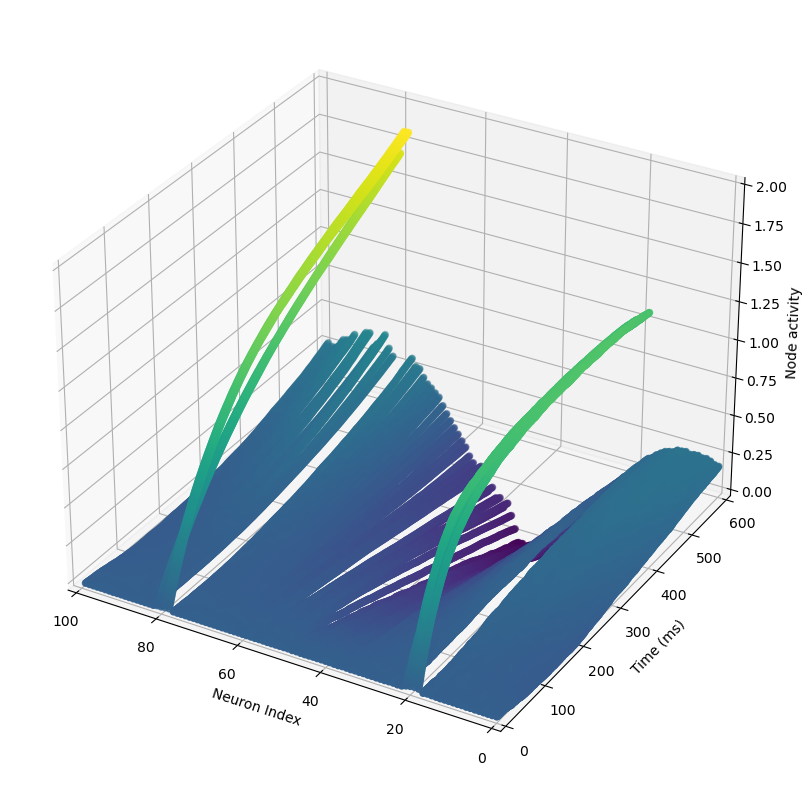

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.01685
σ1 = 0.003
μ2 = 0.0065
σ2 = 0.0016
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(1/(np.sqrt(4*np.pi) * σ) * np.exp(-((i-j)*Δx)**2 / (4*σ**2)) - C)

# Initialize variables
x = np.zeros(N) # internal state of nodes
tau = np.zeros(N) # integration time constant
for i in range(N//2):
    tau[i] = np.random.normal(μ1, σ1)
for i in range(N//2, N):
    tau[i] = np.random.normal(μ2, σ2)
w = np.zeros((N,N)) # synaptic efficacies
for i in range(N):
    for j in range(N):
        w[i,j] = lateral_kernel(i, j)
I_ext = np.zeros(N) # external input
I_ext[18:22] = Ir
I_ext[78:82] = Ip
In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
dt = 1 # time step
tmax = 600 # maximum time to simulate
nt = int(tmax/dt) # number of time steps
x_hist = np.zeros((N, nt)) # history of node activity

# Simulate network
for i in range(nt):
    dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
    x += dxdt * (tau)
    x_hist[:,i] = x

# Plot node activity over time
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
x = np.arange(N)
y = np.arange(nt)*dt
X, Y = np.meshgrid(x, y)
Z = x_hist.T
ax.scatter(X, Y, Z, c=Z, cmap='viridis')
ax.set_xlabel('Neuron Index')
ax.set_ylabel('Time (ms)')
ax.set_zlabel('Node activity')
ax.set_xlim([0, 100])
ax.set_ylim([0, 600])
ax.set_zlim([0, 2])
ax.invert_xaxis()
plt.show()

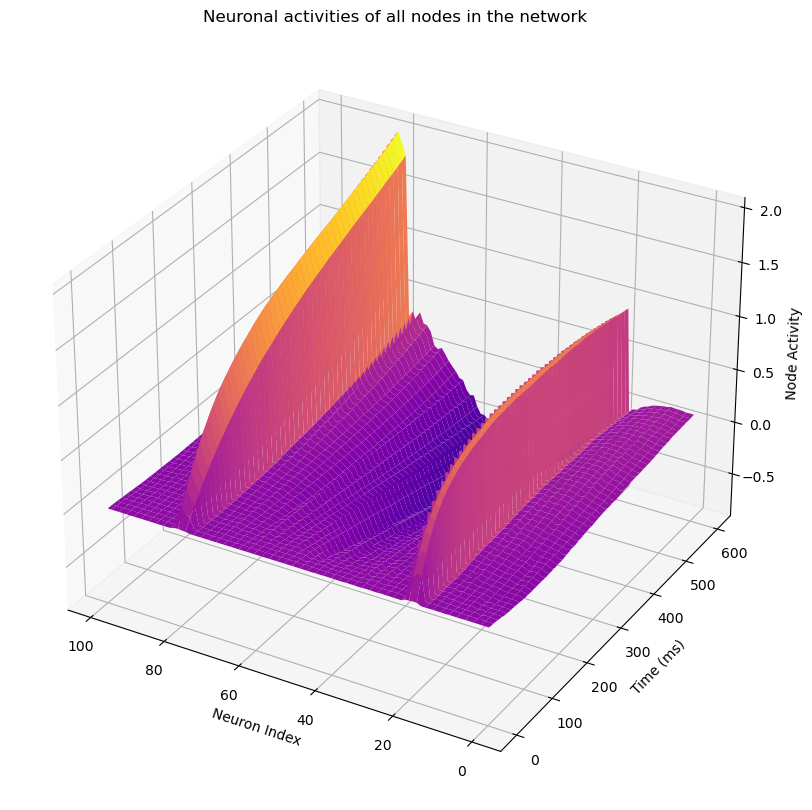

In [13]:
from mpl_toolkits import mplot3d

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.01685
σ1 = 0.003
μ2 = 0.0065
σ2 = 0.0016
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(1/(np.sqrt(4*np.pi) * σ) * np.exp(-((i-j)*Δx)**2 / (4*σ**2)) - C)

# Initialize variables
x = np.zeros(N) # internal state of nodes
tau = np.zeros(N) # integration time constant
for i in range(N//2):
    tau[i] = np.random.normal(μ1, σ1)
for i in range(N//2, N):
    tau[i] = np.random.normal(μ2, σ2)
w = np.zeros((N,N)) # synaptic efficacies
for i in range(N):
    for j in range(N):
        w[i,j] = lateral_kernel(i, j)
I_ext = np.zeros(N) # external input
I_ext[18:22] = Ir
I_ext[78:82] = Ip
In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
dt = 1 # time step
tmax = 600 # maximum time to simulate
nt = int(tmax / dt) # number of time steps
x_hist = np.zeros((N, nt)) # history of node activity

# Simulate network
for i in range(nt):
    dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
    x += dxdt * (tau)
    x_hist[:,i] = x

# Create 3D plot of node activity over time
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
x_axis = np.arange(N)
y_axis = np.arange(nt) * dt
X, Y = np.meshgrid(x_axis, y_axis)
Z = x_hist[X.astype(int), Y.astype(int)]
ax.plot_surface(X, Y, Z, cmap='plasma')
ax.set_xlabel('Neuron Index')
ax.set_ylabel('Time (ms)')
ax.set_zlabel('Node Activity')
ax.set_title('Neuronal activities of all nodes in the network')
ax.invert_xaxis()
plt.show()

In [34]:
# Control Condition - Correction RT

import numpy as np

# Define parameters
Th = 1.025
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.01685
σ1 = 0.003
μ2 = 0.0065
σ2 = 0.0016
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

distances = []

for i in range(500):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    # Simulate network
    for i in range(5000):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        #if x[79] >= Th and x[19] < Th:
        #    if x_hist[80,i] + 0.05 >= 0.1791 and x_hist[80,i] + 0.05 <= 0.1792:
        #        point = (i*dt + 30) - 100
        #        #print(point)
        #        distances.append(point)
        #        break
        
        #if x_hist[80,i] + 0.05 >= Th and x_hist[80,i] + 0.05 <= 0.1792 and x_hist[20,i] + 0.05 < Th:
        #        point = (i*dt + 30) - 100
        #        print(point)
        #        distances.append(point)
        #        break
        
        """
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 >= Th:
            if np.argmax(x_hist[80,i:]) < np.argmax(x_hist[20,i:]):
                point = (np.argmax(x_hist[80,i:]) + i)*dt - (np.argmax(x_hist[20,i:]) + i)*dt
                distances.append(point)
                break
            else:
                if i*dt + 30 < 100:
                    point = 100 - (i*dt + 30)
                    distances.append(point)
                    print(point)
                    break
                else:
                    point = i*dt + 30 - 100
                    distances.append(point)
                    print(point)
                    break
        """
        
        if x_hist[80,i] >= Th and x_hist[20,i] < Th:
            point = (i*dt - 100) + 30
            print(point)
            distances.append(point)
            break
           
        # Check if both node 20 and node 80 have reached the threshold
        #if x_hist[20,i] + 0.05 < Th and x_hist[80,i] + 0.05 >= Th:
        #    point = (i*dt + 30) - 100
        #    print(point)
        #    distances.append(point)
        #    break
        
        # Check if node 80 reaches threshold Th before node 20 does
        #if x_hist[80,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < 0.1792 and x_hist[20,i] + 0.05 < Th:
        #    point = (i*dt - 100) + 30
        #    print(i*dt)
        #    print(point)
        #    distances.append(point)
        #    break
        
median_distance = np.median(distances)
std_distance = np.std(distances)
print('Median distance: ', median_distance)
print(std_distance)

169
170
173
526
248
160
565
161
179
188
513
170
169
195
191
551
534
159
168
553
505
189
164
162
200
529
164
190
166
167
294
195
463
227
523
475
163
204
326
489
177
446
125
170
474
519
424
227
155
136
407
159
533
174
408
268
154
212
210
433
550
148
177
181
461
196
461
540
160
568
513
178
141
209
570
175
160
240
487
129
218
154
498
163
198
414
177
188
181
189
162
171
540
147
570
170
546
535
501
474
151
493
503
427
495
182
435
134
229
184
194
185
178
153
212
506
182
171
210
167
173
158
173
375
199
156
326
202
381
458
206
500
168
162
168
189
143
231
369
462
200
166
204
392
155
192
211
225
424
192
161
141
152
156
217
158
464
490
162
397
208
526
166
527
173
172
262
145
193
575
148
565
191
440
280
228
182
519
197
160
192
391
521
182
468
185
183
422
170
190
391
549
182
163
153
426
562
149
195
217
190
181
476
174
191
492
175
191
187
551
155
135
574
195
156
181
437
516
152
160
163
511
410
528
165
458
477
306
187
187
220
211
309
187
148
175
462
443
200
182
280
169
205
194
182
508
442
167
198
142


In [16]:
# Schizophrenia Condition - Correction RT

# This is computing the median distance for node 20 (so from 50 ms to when node 20 hits the threshold)

# Should be ~258 ms

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0135
σ1 = 0.005
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

distances = []

for i in range(500):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    # Simulate network
    for i in range(5000):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)

        if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
            point1 = (i*dt)
            break
        
for i in range(500):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        # Check if both node 20 and node 80 have reached the threshold
        if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 >= Th:
            # Check if node 80 reached the threshold after node 20
            if np.argmax(x_hist[:,i] + 0.05 == x_hist[20,i] + 0.05) < np.argmax(x_hist[:,i] + 0.05 == x_hist[80,i] + 0.05):
                point2  = (i*dt)
                print(abs(point2 - point1))
                distances.append(point2 - point1)
                break
            
median_distance = np.median(distances)
std_distance = np.std(distances)
print('Median distance: ', median_distance)
print(std_distance)

C:\Users\micha\AppData\Local\Temp\ipykernel_11788\3950509218.py:31: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-x))) - θ


163
267
331
198
365
386
271
207
399
193
301
286
162
321
176
278
351
283
158
162
184
352
178
185
196
221
225
279
109
162
397
141
225
367
348
355
271
109
400
363
95
218
210
270
298
271
350
399
294
258
202
376
254
208
349
381
187
215
390
237
187
349
146
95
239
279
362
287
266
229
242
208
232
210
312
116
244
266
321
400
190
318
388
212
297
208
261
264
174
345
258
306
206
173
327
182
235
341
343
401
249
187
369
176
220
364
151
360
375
354
321
238
121
231
355
310
294
375
130
274
332
116
327
163
250
362
198
307
234
252
266
340
263
324
191
234
219
258
239
400
309
363
199
192
232
178
225
193
211
329
297
223
373
178
155
108
219
229
167
279
139
263
343
283
164
241
262
315
142
368
272
340
227
325
323
326
134
294
348
387
223
299
234
224
250
271
175
188
349
257
190
177
166
284
369
349
210
377
135
173
240
202
362
266
232
146
335
304
378
335
165
313
305
131
221
280
287
325
232
304
187
266
244
355
Median distance:  259.5
77.52665036656717


In [24]:
# Parkinson's Condition Error Rate at Time Point 1

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0105
σ1 = 0.001
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.005
ntrials = 5000
trials = 500

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

count = 0  # initialize count

for i in range(trials):
    # Initialize variables
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity
    reached_th = np.zeros(N) # to keep track of which nodes have reached threshold
    # Simulate network
    for i in range(nt):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
            reached_th[20] = 0 # reset the threshold flag for node 20
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        # Check if node 20 reaches threshold before node 80
        if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
            count += 1
            break
        
        """
        # Check if node 20 or node 80 reaches threshold
        if x_hist[20,i] + 0.05 >= Th or x_hist[80,i] + 0.05 >= Th:
            # Check if both node 20 and node 80 have reached the threshold
            if x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 >= Th:
                # Check if node 20 reached the threshold before node 80
                if np.argmax(x_hist[:,i] == x_hist[20,i]) < np.argmax(x_hist[:,i] == x_hist[80,i]):
                    count += 1
                    break        
            # Check if only node 20 reached the threshold
            elif x_hist[20,i] + 0.05 >= Th and x_hist[80,i] + 0.05 < Th:
                count += 1
                break
        """

print("Schzophrenia Condition") # Forgot to change to Parkinson's
print()
print(f"(Error) Node 20 reached the threshold before node 80 in {count} out of {trials} trials.")
percentage = float((count/trials)*100)
print("(Error) Node 20 reached the threshold before Node 80 in {:.2f}% of simulations".format(percentage))

C:\Users\micha\AppData\Local\Temp\ipykernel_7820\2534694811.py:28: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-x))) - θ


Schizophrenia Condition

(Error) Node 20 reached the threshold before node 80 in 175 out of 500 trials.
(Error) Node 20 reached the threshold before Node 80 in 35.00% of simulations


In [55]:
# Parkinson's Condition - Antisaccade RT at Time Point 1

# This is the mean distance for node 80 (the time from 100 ms to when node 80 reaches the threshold)

# Should be ~430 (+- 30)

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0105
σ1 = 0.001
μ2 = 0.004751
σ2 = 0.0004
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

# Initialize variables
distances = []
for i in range(300):
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity

    # Simulate network
    for i in range(5000):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 < Th:
            point = (i*dt - 100) + 30 # Plus 30 to account for travel time of neural signal
            print(point)
            distances.append(point)
            break
"""
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 >= Th:
            if np.argmax(x_hist[80,i:]) < np.argmax(x_hist[20,i:]):
                point = (np.argmax(x_hist[80,i:]) + i)*dt - (np.argmax(x_hist[20,i:]) + i)*dt
                distances.append(point)
                break
            else:
                if i*dt + 30 < 100:
                    point = 100 - (i*dt + 30)
                    distances.append(point)
                    print(point)
                    break
                else:
                    point = i*dt + 30 - 100
                    distances.append(point)
                    print(point)
                    break
"""
                    
mean_distance = np.mean(distances)
std_distance = np.std(distances)
print('Mean distance: ', mean_distance)
print(std_distance)

435
438
404
391
441
417
404
421
409
460
429
402
434
428
393
458
424
446
408
400
400
498
440
427
412
391
441
429
467
418
491
416
400
396
428
437
410
466
391
430
484
450
405
424
443
424
451
448
424
422
377
477
459
414
447
461
413
385
422
413
466
414
457
413
429
444
440
457
456
412
457
380
457
430
449
437
473
464
443
422
463
378
493
394
423
470
384
415
444
467
519
425
438
402
486
473
461
410
441
475
384
516
472
383
409
443
445
479
493
477
535
372
455
419
396
446
410
412
421
398
434
425
401
506
463
426
438
413
442
441
365
468
439
418
451
407
414
431
432
420
461
396
392
464
490
405
445
460
411
436
451
393
485
433
451
391
375
405
417
383
435
460
380
412
411
408
409
435
405
361
440
515
389
409
415
403
494
436
458
424
413
413
412
429
464
414
456
416
402
480
450
419
377
417
443
444
400
424
409
395
367
370
415
454
469
393
426
478
466
388
457
388
428
419
432
408
450
414
430
441
418
420
412
440
467
528
395
404
376
422
425
433
427
404
424
413
427
489
435
451
390
477
444
423
410
468
492
390
492
392


In [64]:
# Parkinson's Condition - Antisaccade RT at Time Point 2

# This is the mean distance for node 80 (the time from 100 ms to when node 80 reaches the threshold)

# Should be ~407 (+- 27)

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0105
σ1 = 0.001
μ2 = 0.004
σ2 = 0.002
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

# Initialize variables
distances = []
for i in range(300):
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity

    # Simulate network
    for i in range(5000):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 < Th:
            point = (i*dt - 100) + 30 # Plus 30 to account for travel time of neural signal
            print(point)
            distances.append(point)
            break
"""
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 >= Th:
            if np.argmax(x_hist[80,i:]) < np.argmax(x_hist[20,i:]):
                point = (np.argmax(x_hist[80,i:]) + i)*dt - (np.argmax(x_hist[20,i:]) + i)*dt
                distances.append(point)
                break
            else:
                if i*dt + 30 < 100:
                    point = 100 - (i*dt + 30)
                    distances.append(point)
                    print(point)
                    break
                else:
                    point = i*dt + 30 - 100
                    distances.append(point)
                    print(point)
                    break
"""
                    
mean_distance = np.mean(distances)
std_distance = np.std(distances)
print('Mean distance: ', mean_distance)
print(std_distance)

398
396
403
408
380
431
381
432
441
391
375
380
390
408
438
443
372
417
412
368
406
398
434
417
377
400
356
373
423
424
387
448
431
371
420
380
394
421
443
417
443
416
404
413
428
388
425
462
431
383
376
432
432
399
378
425
393
373
420
385
399
367
479
391
403
483
409
405
433
423
378
416
390
461
398
410
458
393
370
406
452
439
425
373
422
422
402
450
403
409
424
408
407
459
382
373
406
444
408
403
397
435
412
425
351
403
410
420
420
407
443
383
411
384
452
371
353
385
409
428
402
372
372
402
417
383
410
432
443
392
435
435
493
374
420
402
432
386
453
469
440
386
370
441
388
416
395
463
456
439
416
399
452
455
433
412
443
369
406
405
441
397
454
419
411
406
409
465
381
376
431
388
405
381
417
448
456
429
396
431
377
408
466
413
437
399
419
397
397
431
445
399
400
385
425
399
382
392
411
352
417
419
423
435
368
444
425
425
404
414
411
383
385
395
447
463
456
434
405
394
393
462
357
470
387
374
389
434
414
400
392
392
437
393
385
400
365
392
398
381
432
447
424
376
365
381
402
420
433
383


In [77]:
# MSA Condition - Antisaccade RT at Time Point 1

# This is the mean distance for node 80 (the time from 100 ms to when node 80 reaches the threshold)

# Should be ~445 (+- 38)

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0105
σ1 = 0.001
μ2 = 0.00461
σ2 = 0.00046
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

# Initialize variables
distances = []
for i in range(300):
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity

    # Simulate network
    for i in range(5000):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 < Th:
            point = (i*dt - 100) + 30 # Plus 30 to account for travel time of neural signal
            print(point)
            distances.append(point)
            break
"""
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 >= Th:
            if np.argmax(x_hist[80,i:]) < np.argmax(x_hist[20,i:]):
                point = (np.argmax(x_hist[80,i:]) + i)*dt - (np.argmax(x_hist[20,i:]) + i)*dt
                distances.append(point)
                break
            else:
                if i*dt + 30 < 100:
                    point = 100 - (i*dt + 30)
                    distances.append(point)
                    print(point)
                    break
                else:
                    point = i*dt + 30 - 100
                    distances.append(point)
                    print(point)
                    break
"""
                    
mean_distance = np.mean(distances)
std_distance = np.std(distances)
print('Mean distance: ', mean_distance)
print(std_distance)

434
447
451
496
475
448
475
454
426
417
433
396
450
459
458
455
485
482
460
429
398
436
505
427
460
463
414
439
426
421
478
433
443
407
436
399
455
448
456
547
421
457
399
440
468
416
431
417
391
485
434
455
514
419
401
479
480
408
419
396
388
410
477
478
514
413
507
399
416
466
454
444
465
467
476
526
489
454
452
394
448
421
433
489
412
475
446
475
462
502
426
438
497
416
426
399
399
435
401
410
502
416
404
504
428
368
433
439
473
484
435
382
526
424
438
446
433
409
455
477
460
405
375
420
403
505
406
471
485
405
485
484
448
554
449
459
399
415
456
419
472
474
390
420
501
447
450
387
451
433
458
457
392
454
449
514
469
367
448
412
399
392
517
424
474
431
405
435
465
417
436
457
433
409
468
443
475
403
395
407
488
489
398
418
464
510
412
438
430
475
423
368
406
428
465
430
410
414
460
406
461
424
495
434
485
469
455
465
477
457
421
443
456
402
379
419
479
462
468
437
503
467
414
430
356
466
453
455
530
441
433
426
445
449
463
453
434
448
452
431
513
432
426
457
457
443
426
429
448
428


In [88]:
# MSA Condition - Antisaccade RT at Time Point 2

# This is the mean distance for node 80 (the time from 100 ms to when node 80 reaches the threshold)

# Should be ~440 (+- 33)

import numpy as np

# Define parameters
Th = 0.1791
C = 0.35
Ir = 1
Ip = 1.5
μ1 = 0.0105
σ1 = 0.001
μ2 = 0.00462
σ2 = 0.00038
T = 50
σ = 2*np.pi/10
Δx = 2*np.pi/100
B = 1
N = 100
β = 0.5
θ = 0.5
μ_n = 0
σ_n = 0.05
ntrials = 5000

# Define sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x))) - θ

# Define lateral interaction kernel
def lateral_kernel(i, j):
    return B*(((1/(np.sqrt(4*np.pi) * σ)) * np.exp((-((i-j)*Δx)**2) / (4*σ**2))) - C)

# Initialize variables
distances = []
for i in range(300):
    x = np.zeros(N) # internal state of nodes
    tau = np.zeros(N) # integration time constant
    for i in range(N//2):
        tau[i] = np.random.normal(μ1, σ1)
    for i in range(N//2, N):
        tau[i] = np.random.normal(μ2, σ2)
    w = np.zeros((N,N)) # synaptic efficacies
    for i in range(N):
        for j in range(N):
            w[i,j] = lateral_kernel(i, j)
    I_ext = np.zeros(N) # external input
    I_ext[18:22] = Ir
    I_ext[78:82] = Ip
    I_ext[20] = 0
    I_ext[80] = 0
    In = np.random.normal(μ_n, σ_n, (N, ntrials)) # background noise
    dt = 1 # time step
    nt = 5000 # number of time steps
    x_hist = np.zeros((N, nt)) # history of node activity

    # Simulate network
    for i in range(5000):
        if i*dt >= 50:
            I_ext[18:22] = Ir
        if i*dt >= 100:
            I_ext[78:82] = Ip
        if i*dt >= 650:
            x[20] = 0
            x[80] = 0
        dxdt = -x + np.dot(w, (sigmoid(β*x))) + I_ext + In[:,i]
        x += dxdt * (tau)
        x_hist[:,i] = x * (0.126)
        
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 < Th:
            point = (i*dt - 100) + 30 # Plus 30 to account for travel time of neural signal
            print(point)
            distances.append(point)
            break
"""
        if x_hist[80,i] + 0.05 >= Th and x_hist[20,i] + 0.05 >= Th:
            if np.argmax(x_hist[80,i:]) < np.argmax(x_hist[20,i:]):
                point = (np.argmax(x_hist[80,i:]) + i)*dt - (np.argmax(x_hist[20,i:]) + i)*dt
                distances.append(point)
                break
            else:
                if i*dt + 30 < 100:
                    point = 100 - (i*dt + 30)
                    distances.append(point)
                    print(point)
                    break
                else:
                    point = i*dt + 30 - 100
                    distances.append(point)
                    print(point)
                    break
"""
                    
mean_distance = np.mean(distances)
std_distance = np.std(distances)
print('Mean distance: ', mean_distance)
print(std_distance)

486
427
433
457
455
474
413
421
460
420
452
426
394
385
511
392
447
418
475
466
497
449
479
458
442
428
416
418
451
490
396
453
431
440
471
423
486
465
476
429
432
413
465
416
415
455
404
447
448
406
463
444
405
419
417
407
501
455
449
482
465
507
530
423
492
445
369
476
384
402
458
454
385
463
459
453
455
402
495
421
457
414
445
493
404
467
443
438
428
502
405
440
406
422
445
485
401
429
445
403
428
407
432
455
473
394
487
443
429
375
433
486
414
401
476
444
461
433
531
463
433
424
396
401
423
440
392
487
484
473
406
420
452
431
488
437
468
443
408
446
402
444
448
414
416
417
393
432
467
475
477
413
420
365
439
361
462
537
449
433
450
430
439
476
499
429
445
391
443
444
428
428
432
470
422
494
424
445
399
417
430
422
499
516
471
456
433
443
431
397
437
467
428
398
440
538
420
423
462
436
410
477
478
440
390
467
413
424
426
469
457
453
477
467
494
458
442
416
408
478
456
381
424
357
368
407
489
454
410
477
437
486
427
454
387
504
470
447
432
424
388
451
441
461
451
407
468
423
439
443
